In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def lagrange_interpolation(xi, yi, xo):
    """
    Lagrange interpolation of the data (xi, yi) at query points xo.
    """
    Ni = len(xi)
    A = np.zeros((Ni, Ni))
    for k in range(Ni):
        # polynomial with all nodes except k
        temp = np.poly(xi[np.arange(Ni) != k])
        A[k, :] = temp / np.polyval(temp, xi[k])
    return np.polyval(yi @ A, xo)

In [5]:
# ---------------------------
# Test functions and examples
# ---------------------------

x = np.linspace(-1, 1, 1000)
No = 30
xo = np.linspace(-1, 1, No)

Text(0.5, 1.0, 'Runge Function - Uniform Sampling')

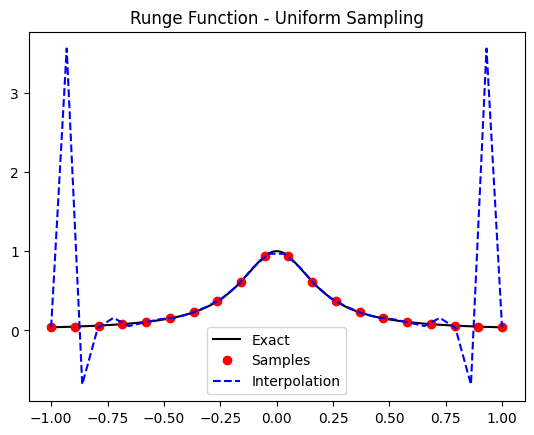

In [6]:
# --- Example #1: Runge function with uniform sampling
runge = lambda x: 1 / (1 + 25 * x**2)
y = runge(x)

Ni = 20
xi = np.linspace(-1, 1, Ni)
yi = runge(xi)

yo = lagrange_interpolation(xi, yi, xo)

plt.figure()
plt.plot(x, y, 'k', linewidth=1.5, label='Exact')
plt.plot(xi, yi, 'ro', label='Samples')
plt.plot(xo, yo, 'b--', label='Interpolation')
plt.legend()
plt.title("Runge Function - Uniform Sampling")

Text(0.5, 1.0, 'Runge Function - Denser Sampling at Borders')

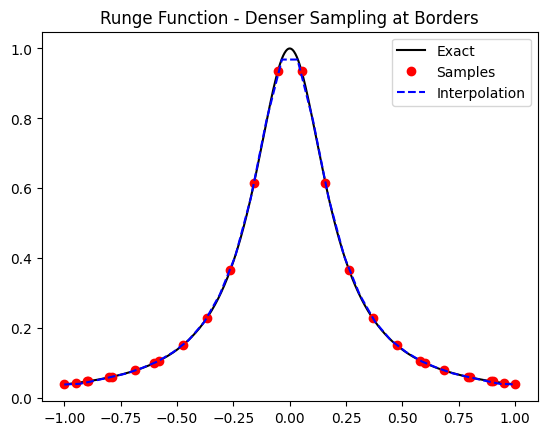

In [7]:
# --- Example #2: Runge function with more points at borders
xi = np.concatenate([np.linspace(-1, 1, 20), [0.6, 0.8, 0.9, 0.95, -0.95, -0.9, -0.8, -0.6]])
yi = runge(xi)
yo = lagrange_interpolation(xi, yi, xo)

plt.figure()
plt.plot(x, runge(x), 'k', linewidth=1.5, label='Exact')
plt.plot(xi, yi, 'ro', label='Samples')
plt.plot(xo, yo, 'b--', label='Interpolation')
plt.legend()
plt.title("Runge Function - Denser Sampling at Borders")

Text(0.5, 1.0, 'Polynomial Function')

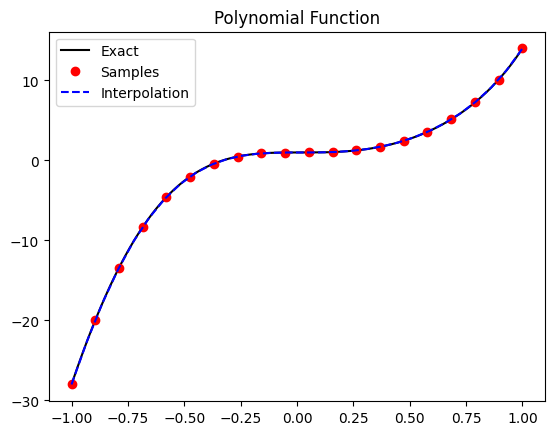

In [8]:
# --- Example #3: Polynomial function
pol = lambda x: 5*x**6 - 12*x**4 + 21*x**3 - x**2 + 1
y = pol(x)

Ni = 20
xi = np.linspace(-1, 1, Ni)
yi = pol(xi)
yo = lagrange_interpolation(xi, yi, xo)

plt.figure()
plt.plot(x, y, 'k', linewidth=1.5, label='Exact')
plt.plot(xi, yi, 'ro', label='Samples')
plt.plot(xo, yo, 'b--', label='Interpolation')
plt.legend()
plt.title("Polynomial Function")

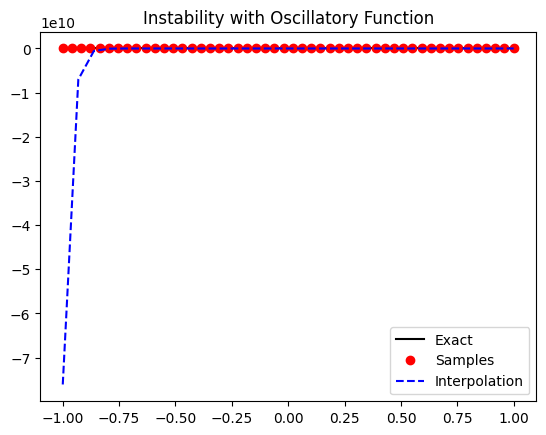

In [9]:
# --- Example #4: Oscillatory function (sin), instability emerges
y = np.sin(5 * x)

Ni = 50  # high-degree polynomial interpolation
xi = np.linspace(-1, 1, Ni)
yi = np.sin(5 * xi)
yo = lagrange_interpolation(xi, yi, xo)

plt.figure()
plt.plot(x, y, 'k', linewidth=1.5, label='Exact')
plt.plot(xi, yi, 'ro', label='Samples')
plt.plot(xo, yo, 'b--', label='Interpolation')
plt.legend()
plt.title("Instability with Oscillatory Function")

plt.show()
